Paula Guerrero


**Email Spam Classification**

1. PREPARING THE RAW DATA

In [ ]:
#You do not need to execute this cell
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install pandas scikit-learn nltk scipy matplotlib seaborn

In [ ]:
import pandas as pd
# Preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Tokenization
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import re
# Splitting the data
from sklearn.model_selection import train_test_split, cross_val_score, KFold
# To work with Decision Trees
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# To work with KNN
from sklearn.neighbors import KNeighborsClassifier
# To evaluate the performance of the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
#to visualize
import matplotlib.pyplot as plt
import os

The following cell was originally used by the students to create the DataFrame and the CSV file named emails.csv. However, to make the results easily reproducible, the resulting file has been uploaded to a public Drive link. Therefore, you should execute cell 5.

In [ ]:
#Do not execute this cell
texts = []
labels = []

for kind in ["spam", "ham"]:
  folder = f"/content/gdrive/MyDrive/email_spam/spam/{kind}"
  for filename in os.listdir(folder):
    with open(f"{folder}/{filename}", "r", encoding="utf-8", errors="ignore") as f:
      texts.append(f.read())
      labels.append(kind)

df = pd.DataFrame({"text": texts, "label": labels})
df.to_csv("emails.csv", index=False)

df.head(10)


,text,label
0,Subject: message subject\n,spam
1,Subject: thanks ! really\nmorning woodson\nare...,spam
2,Subject: high quality\nsexy\nmarried ladies lo...,spam
3,Subject: toshiba dlp projectors special\ndlp\n...,spam
4,Subject: you pay too much for meds !\ngot a co...,spam
5,Subject: we are the best qns\nlook at this of ...,spam
6,Subject: order royal replica watches online\ng...,spam
7,Subject: your pre order\ncan ' t see the image...,spam
8,Subject: fwd : [ centimeters ] 64 % - off vico...,spam
9,"Subject: bu , y cia ' lis soft ' tabs , 1 day ...",spam


In [ ]:
#Execute this cell
file_id = "1altqo2ANCRq903UEThhGDmMTCywdIyS8"
url = f"https://drive.google.com/uc?id={file_id}&export=download"

df = pd.read_csv(url)
df.head(10)



,text,label
0,Subject: message subject\n,spam
1,Subject: thanks ! really\nmorning woodson\nare...,spam
2,Subject: high quality\nsexy\nmarried ladies lo...,spam
3,Subject: toshiba dlp projectors special\ndlp\n...,spam
4,Subject: you pay too much for meds !\ngot a co...,spam
5,Subject: we are the best qns\nlook at this of ...,spam
6,Subject: order royal replica watches online\ng...,spam
7,Subject: your pre order\ncan ' t see the image...,spam
8,Subject: fwd : [ centimeters ] 64 % - off vico...,spam
9,"Subject: bu , y cia ' lis soft ' tabs , 1 day ...",spam


In [ ]:

df['label'].unique()


array(['spam', 'ham'], dtype=object)

In [ ]:
# Convert into binary > 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['label'] = df['label'].map({'ham': 0, 'spam' : 1}).astype(int)
df.head()




,text,label
0,Subject: message subject\n,1
1,Subject: thanks ! really\nmorning woodson\nare...,1
2,Subject: high quality\nsexy\nmarried ladies lo...,1
3,Subject: toshiba dlp projectors special\ndlp\n...,1
4,Subject: you pay too much for meds !\ngot a co...,1


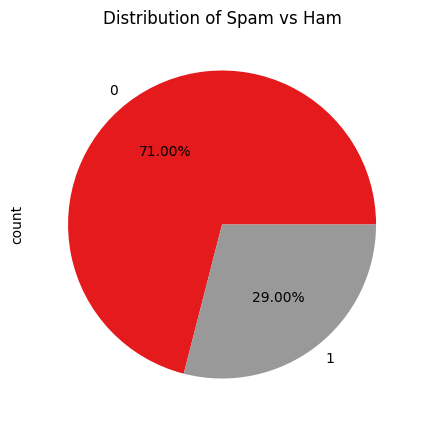

In [ ]:
spread = df['label'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')
plt.show()

# 2. PREPROCESSING THE DATA

In [ ]:
#tokenization
# download tokenizer models
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Cleaning
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text, lowercase=True, remove_punct=True, remove_numbers=False, remove_stopwords=False, remove_html=False, remove_urls=True, remove_emails=True,remove_subject=True, extract_spam_indicators=True):
    if remove_subject:
        text = re.sub(r'^Subject\s*:\s*', '', text, flags=re.IGNORECASE)
    if remove_html:
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'&[a-z]+;', '', text)  # &nbsp; etc
    if remove_urls:
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    if remove_emails:
        text = re.sub(r'\S*@\S*\s?', '', text)
    if lowercase:
        text = text.lower()
    if remove_punct:
        text = re.sub(r'[^\w\s]', '', text)
    if remove_numbers:
        text = re.sub(r'\d+', '', text)
    if remove_stopwords:
        words = text.split()
        words = [w for w in words if w not in stop_words]
        text = ' '.join(words)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = df['text']
cleaned_corpus = [clean_text(text, lowercase=True, remove_punct=True, remove_numbers=True, remove_stopwords=True, remove_html=True, remove_subject=True, extract_spam_indicators=True) for text in corpus]
for i, text in enumerate(corpus[:10]):
  print('-' * 60)
  print(f'Original: {text}')
  print(f'Cleaned:{cleaned_corpus[i]}\n')

------------------------------------------------------------
Original: Subject: message subject

Cleaned:message subject

------------------------------------------------------------
Original: Subject: thanks ! really
morning woodson
are you sick of taking pil 1 s ? have you been looking for that extra umphh in the bed - room ?
if so , then we ' ve got the answer for you . it ' s kindof like k / y but a hundred times better .
http : / / abraham . bettergitit . com / x / newly
it ' ll definately make both of your lives more fulfilling .

Cleaned:thanks really morning woodson sick taking pil looking extra umphh bed room got answer kindof like k hundred times better http abraham bettergitit com x newly definately make lives fulfilling

------------------------------------------------------------
Original: Subject: high quality
sexy
married ladies looking for discrete encounters
dating cheating house wives is very exciting , and these ladies are
looking for one thing , sex on the side . mo

In [ ]:
df_cleaned = pd.DataFrame({"original": corpus,"cleaned": cleaned_corpus})



In [ ]:
#Stemming
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [ ]:
#Porter Stemming
porter = PorterStemmer()

def porter_stem(text):
    stemmed_corpus = []
    for i, sentence in enumerate(text):
        tokens_st1 = word_tokenize(sentence)
        stemmed_tokens = [porter.stem(word) for word in tokens_st1]
        stemmed_corpus.append(stemmed_tokens)
    return stemmed_corpus

stemmed_corpus = porter_stem(cleaned_corpus)

N = 10
for i, tokens in enumerate(stemmed_corpus[:N]):
    original_tokens = word_tokenize(cleaned_corpus[i])

    print(f"Sentence {i+1}")
    print("Original tokens:", original_tokens)
    print("Stemmed tokens:", stemmed_corpus[i])
    print("-" * 70)


Sentence 1
Original tokens: ['message', 'subject']
Stemmed tokens: ['messag', 'subject']
----------------------------------------------------------------------
Sentence 2
Original tokens: ['thanks', 'really', 'morning', 'woodson', 'sick', 'taking', 'pil', 'looking', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundred', 'times', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newly', 'definately', 'make', 'lives', 'fulfilling']
Stemmed tokens: ['thank', 'realli', 'morn', 'woodson', 'sick', 'take', 'pil', 'look', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundr', 'time', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newli', 'defin', 'make', 'live', 'fulfil']
----------------------------------------------------------------------
Sentence 3
Original tokens: ['high', 'quality', 'sexy', 'married', 'ladies', 'looking', 'discrete', 'encounters', 'dating', 'cheating', 'house', 'wives', 'exciting', 'ladies', 'lookin

In [ ]:
#Lancaster Stemming
stemmer = LancasterStemmer()

def lancaster_stem(text):
    stemmer = LancasterStemmer()
    stemmed_lancaster = []
    for i, sentence in enumerate(text):
      tokens_st2 = word_tokenize(sentence)
      stemmed_tokens2 = [stemmer.stem(word) for word in tokens_st2]
      stemmed_lancaster.append(stemmed_tokens2)
    return stemmed_lancaster

lancaster_corpus = lancaster_stem(cleaned_corpus)
N = 10
for i, tokens in enumerate(lancaster_corpus[:N]):
    original_tokens = word_tokenize(cleaned_corpus[i])
    print(f'Sentence {i+1}')
    print('Original tokens:', original_tokens)
    print('Lancaster stemmed tokens:', tokens)
    print('-' * 50)

Sentence 1
Original tokens: ['message', 'subject']
Lancaster stemmed tokens: ['mess', 'subject']
--------------------------------------------------
Sentence 2
Original tokens: ['thanks', 'really', 'morning', 'woodson', 'sick', 'taking', 'pil', 'looking', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundred', 'times', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newly', 'definately', 'make', 'lives', 'fulfilling']
Lancaster stemmed tokens: ['thank', 'real', 'morn', 'woodson', 'sick', 'tak', 'pil', 'look', 'extr', 'umphh', 'bed', 'room', 'got', 'answ', 'kindof', 'lik', 'k', 'hundr', 'tim', 'bet', 'http', 'abraham', 'bettergitit', 'com', 'x', 'new', 'defin', 'mak', 'liv', 'fulfil']
--------------------------------------------------
Sentence 3
Original tokens: ['high', 'quality', 'sexy', 'married', 'ladies', 'looking', 'discrete', 'encounters', 'dating', 'cheating', 'house', 'wives', 'exciting', 'ladies', 'looking', 'one', 'thing', 'sex', 'side', 'm

In [ ]:
#Snowball Stemming

def snowball_stem(text):
    stemmer2 = SnowballStemmer('english')
    stemmed_snowball = []
    for i, sentence in enumerate(text):
      tokens_st3 = word_tokenize(sentence)
      stemmed_tokens3 = [stemmer2.stem(word) for word in tokens_st3]
      stemmed_snowball.append(stemmed_tokens3)
    return stemmed_snowball

snowball_corpus = snowball_stem(cleaned_corpus)
N = 10
for i, tokens in enumerate(snowball_corpus[:N]):
    original_tokens = word_tokenize(cleaned_corpus[i])
    print(f'Sentence {i+1}')
    print('Original tokens:', original_tokens)
    print('Snowball stemmed tokens:', tokens)
    print('-' * 50)

Sentence 1
Original tokens: ['message', 'subject']
Snowball stemmed tokens: ['messag', 'subject']
--------------------------------------------------
Sentence 2
Original tokens: ['thanks', 'really', 'morning', 'woodson', 'sick', 'taking', 'pil', 'looking', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundred', 'times', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newly', 'definately', 'make', 'lives', 'fulfilling']
Snowball stemmed tokens: ['thank', 'realli', 'morn', 'woodson', 'sick', 'take', 'pil', 'look', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundr', 'time', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newli', 'defin', 'make', 'live', 'fulfil']
--------------------------------------------------
Sentence 3
Original tokens: ['high', 'quality', 'sexy', 'married', 'ladies', 'looking', 'discrete', 'encounters', 'dating', 'cheating', 'house', 'wives', 'exciting', 'ladies', 'looking', 'one', 'thing', 's

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_corpus = []
    for i, sentence in enumerate(text):
      tokens_lmm = word_tokenize(sentence)
      lemmas = [lemmatizer.lemmatize(token) for token in tokens_lmm]
      lemmatized_corpus.append(lemmas)
    return lemmatized_corpus

lmm_corpus = lemmatize(cleaned_corpus)

N = 10

for i, tokens in enumerate(lmm_corpus[:N]):
    original_tokens = word_tokenize(cleaned_corpus[i])
    print(f'Sentence {i+1}')
    print('Original tokens:', original_tokens)
    print('Lemmatized tokens:', tokens)
    print('-' * 50)


[nltk_data] Downloading package punkt to /Users/pau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sentence 1
Original tokens: ['message', 'subject']
Lemmatized tokens: ['message', 'subject']
--------------------------------------------------
Sentence 2
Original tokens: ['thanks', 'really', 'morning', 'woodson', 'sick', 'taking', 'pil', 'looking', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundred', 'times', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newly', 'definately', 'make', 'lives', 'fulfilling']
Lemmatized tokens: ['thanks', 'really', 'morning', 'woodson', 'sick', 'taking', 'pil', 'looking', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundred', 'time', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newly', 'definately', 'make', 'life', 'fulfilling']
--------------------------------------------------
Sentence 3
Original tokens: ['high', 'quality', 'sexy', 'married', 'ladies', 'looking', 'discrete', 'encounters', 'dating', 'cheating', 'house', 'wives', 'exciting', 'ladies', 'looking', 'one', 't

In [ ]:
#POS tagging
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

def lemmatize_corpus_pos(text):
    lemmatized_pos_corpus = []
    for sentence in text:
        tokens = word_tokenize(sentence)
        pos_tags = pos_tag(tokens)
        lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
        lemmatized_pos_corpus.append(lemmas)
    return lemmatized_pos_corpus

pos_corpus = lemmatize_corpus_pos(cleaned_corpus)

N = 10


for i, lemmas in enumerate(pos_corpus[:N]):
    tokens = word_tokenize(cleaned_corpus[i])
    pos_tags = pos_tag(tokens)
    print(f"Sentence {i+1}:")
    print("Original tokens:", tokens)
    print("POS tags:", pos_tags)
    print("Lemmatized tokens:", lemmas)
    print("-" * 60)



[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/pau/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /Users/pau/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pau/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Sentence 1:
Original tokens: ['message', 'subject']
POS tags: [('message', 'NN'), ('subject', 'NN')]
Lemmatized tokens: ['message', 'subject']
------------------------------------------------------------
Sentence 2:
Original tokens: ['thanks', 'really', 'morning', 'woodson', 'sick', 'taking', 'pil', 'looking', 'extra', 'umphh', 'bed', 'room', 'got', 'answer', 'kindof', 'like', 'k', 'hundred', 'times', 'better', 'http', 'abraham', 'bettergitit', 'com', 'x', 'newly', 'definately', 'make', 'lives', 'fulfilling']
POS tags: [('thanks', 'NNS'), ('really', 'RB'), ('morning', 'NN'), ('woodson', 'NN'), ('sick', 'NN'), ('taking', 'VBG'), ('pil', 'JJ'), ('looking', 'VBG'), ('extra', 'JJ'), ('umphh', 'JJ'), ('bed', 'NN'), ('room', 'NN'), ('got', 'VBD'), ('answer', 'RB'), ('kindof', 'VBN'), ('like', 'IN'), ('k', 'NN'), ('hundred', 'VBD'), ('times', 'NNS'), ('better', 'RBR'), ('http', 'NN'), ('abraham', 'JJ'), ('bettergitit', 'NN'), ('com', 'NN'), ('x', 'NNP'), ('newly', 'RB'), ('definately', 'RB'),

# 3. TEXT REPRESENTATION: FROM TEXT TO NUMBERS


In [ ]:
#Bag of Words
def build_bow(corpus_tokens):
  corpus_text = [' '.join(tokens) for tokens in corpus_tokens]

  vectorizer = CountVectorizer()
  X =vectorizer.fit_transform(corpus_text)
  vocab = vectorizer.get_feature_names_out()
  df_bow = pd.DataFrame(X.toarray(), columns=vocab)

  return df_bow, vectorizer

In [ ]:
df_bow, vectorizer = build_bow(pos_corpus)

print('DF BoW\n', df_bow.head(30))
print("-" * 60)
print('Shape:', df_bow.shape)

DF BoW
     aa  aaa  aabda  aabvmmq  aac  aachecar  aaer  aafco  aaiabe  aaigrcrb  \
0    0    0      0        0    0         0     0      0       0         0   
1    0    0      0        0    0         0     0      0       0         0   
2    0    0      0        0    0         0     0      0       0         0   
3    0    0      0        0    0         0     0      0       0         0   
4    0    0      0        0    0         0     0      0       0         0   
5    0    0      0        0    0         0     0      0       0         0   
6    0    0      0        0    0         0     0      0       0         0   
7    0    0      0        0    0         0     0      0       0         0   
8    0    0      0        0    0         0     0      0       0         0   
9    0    0      0        0    0         0     0      0       0         0   
10   0    0      0        0    0         0     0      0       0         0   
11   0    0      0        0    0         0     0      0       0     

In [ ]:
#BOW SPARSE MATRIX

def build_bow(corpus_tokens, max_features=None):
    corpus_text = [' '.join(tokens) for tokens in corpus_tokens]
    vectorizer = CountVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(corpus_text)  # Sparse matrix
    return X, vectorizer

In [ ]:
X_bow, vectorizer = build_bow(pos_corpus)

print("-" * 60)
print('Shape:', X_bow.shape)

------------------------------------------------------------
Shape: (5172, 41944)


In [ ]:
#TF
def build_tf(corpus_tokens):
  corpus_text = [' '.join(tokens) for tokens in corpus_tokens]

  vectorizer_TF = TfidfVectorizer(use_idf=False)
  X_TF =vectorizer_TF.fit_transform(corpus_text)
  vocab = vectorizer_TF.get_feature_names_out()
  df_tf = pd.DataFrame(X_TF.toarray(), columns=vocab)

  return df_tf, vectorizer_TF

In [ ]:
df_tf, vectorizer_TF = build_tf(pos_corpus)

print('DF TF\n', df_tf.head(30))
print("-" * 60)
print('Shape:', df_tf.shape)

DF TF
      aa  aaa  aabda  aabvmmq  aac  aachecar  aaer  aafco  aaiabe  aaigrcrb  \
0   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
1   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
2   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
3   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
4   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
5   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
6   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
7   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
8   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
9   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
10  0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
11  0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0 

In [ ]:
#TF-IDF
def build_tfidf(corpus_tokens):
  corpus_text = [' '.join(tokens) for tokens in corpus_tokens]

  vectorizer_TFIDF = TfidfVectorizer(use_idf=True)
  X_TFIDF = vectorizer_TFIDF.fit_transform(corpus_text)
  vocab = vectorizer_TFIDF.get_feature_names_out()
  df_tfidf = pd.DataFrame(X_TFIDF.toarray(), columns=vocab)

  return df_tfidf, vectorizer_TFIDF

In [ ]:
df_tfidf, vectorizer_TFIDF = build_tfidf(pos_corpus)

print('DF TFIDF\n', df_tfidf.head(30))
print("-" * 60)
print('Shape:', df_tfidf.shape)

DF TFIDF
      aa  aaa  aabda  aabvmmq  aac  aachecar  aaer  aafco  aaiabe  aaigrcrb  \
0   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
1   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
2   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
3   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
4   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
5   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
6   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
7   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
8   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
9   0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
10  0.0  0.0    0.0      0.0  0.0       0.0   0.0    0.0     0.0       0.0   
11  0.0  0.0    0.0      0.0  0.0       0.0   0.0    0

# 4. SPLITTING THE DATA

In [ ]:
# SPLIT THE DATA - Train/Validation/Test
from sklearn.model_selection import train_test_split
y = df['label']

def split_train_val_test(X, y, test_size=0.20, val_size=0.20, random_state=42):

    # First split- test (20%)
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # Second split
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_temp, y_train_temp,
        test_size=val_size,
        random_state=random_state,
        stratify=y_train_temp
    )


    return (X_train, X_val, X_test,
            y_train, y_val, y_test,
            X_train_temp, y_train_temp)

In [ ]:
# BAG OF WORDS SPLIT

(X_train_bow, X_val_bow, X_test_bow,
 y_train_bow, y_val_bow, y_test_bow,
 X_train_temp_bow, y_train_temp_bow) = split_train_val_test(
    df_bow, y, test_size=0.20, val_size=0.20, random_state=42
)


print("BAG OF WORDS - SPLIT")

print(f"Train:      {len(X_train_bow)} samples ({len(X_train_bow)/len(df_bow)*100:.1f}%)")
print(f"Validation: {len(X_val_bow)} samples ({len(X_val_bow)/len(df_bow)*100:.1f}%)")
print(f"Test:       {len(X_test_bow)} samples ({len(X_test_bow)/len(df_bow)*100:.1f}%)")
print(f"\nFeatures: {X_train_bow.shape[1]}")
print(f"\nTrain Diatribution        > Ham: {(y_train_bow==0).sum()}, Spam: {(y_train_bow==1).sum()}")
print(f" Validation Diatribution    > Ham: {(y_val_bow==0).sum()}, Spam: {(y_val_bow==1).sum()}")
print(f" Test Diatribution          > Ham: {(y_test_bow==0).sum()}, Spam: {(y_test_bow==1).sum()}")



BAG OF WORDS - SPLIT
Train:      3309 samples (64.0%)
Validation: 828 samples (16.0%)
Test:       1035 samples (20.0%)

Features: 41944

Distribución Train        - Ham: 2349, Spam: 960
Distribución Validation   - Ham: 588, Spam: 240
Distribución Test         - Ham: 735, Spam: 300


In [ ]:
# SPLIT FOR BAG OF WORDS -SPARSE

(X_train_bow, X_val_bow, X_test_bow,
 y_train_bow, y_val_bow, y_test_bow,
 X_train_temp_bow, y_train_temp_bow) = split_train_val_test(
    X_bow, y, test_size=0.20, val_size=0.20, random_state=42
)

print("BAG OF WORDS - SPLIT SPARSE")
print(f"Train:      {X_train_bow.shape[0]}")
print(f"Validation: {X_val_bow.shape[0]}")
print(f"Test:       {X_test_bow.shape[0]}")
print(f"\nFeatures: {X_train_bow.shape[1]}")
print(f"\nTrain Diatribution        > Ham: {(y_train_bow==0).sum()}, Spam: {(y_train_bow==1).sum()}")
print(f" Validation Diatribution    > Ham: {(y_val_bow==0).sum()}, Spam: {(y_val_bow==1).sum()}")
print(f" Test Diatribution          > Ham: {(y_test_bow==0).sum()}, Spam: {(y_test_bow==1).sum()}")


BAG OF WORDS - SPLIT SPARSE
Train:      3309
Validation: 828
Test:       1035

Features: 41944

Distribución Train        - Ham: 2349, Spam: 960
Distribución Validation   - Ham: 588, Spam: 240
Distribución Test         - Ham: 735, Spam: 300


In [ ]:
# SPLIT FOR TERM FREQUENCY (TF)

(X_train_tf, X_val_tf, X_test_tf,
 y_train_tf, y_val_tf, y_test_tf,
 X_train_temp_tf, y_train_temp_tf) = split_train_val_test(
    df_tf, y, test_size=0.20, val_size=0.20, random_state=42
)


print("TF - SPLIT")

print(f"Train:      {len(X_train_tf)}")
print(f"Validation: {len(X_val_tf)}")
print(f"Test:       {len(X_test_tf)}")
print(f"\nFeatures: {X_train_tf.shape[1]}")

TERM FREQUENCY (TF) - SPLIT
Train:      3309
Validation: 828
Test:       1035

Features: 41944


In [ ]:
# SPLIT FOR TF-IDF

(X_train_tfidf, X_val_tfidf, X_test_tfidf,
 y_train_tfidf, y_val_tfidf, y_test_tfidf,
 X_train_temp_tfidf, y_train_temp_tfidf) = split_train_val_test(
    df_tfidf, y, test_size=0.20, val_size=0.20, random_state=42
)

print("TF-IDF - SPLIT")
print(f"Train:      {len(X_train_tfidf)}")
print(f"Validation: {len(X_val_tfidf)}")
print(f"Test:       {len(X_test_tfidf)}")
print(f"\nFeatures: {X_train_tfidf.shape[1]}")


TF-IDF - SPLIT
Train:      3309
Validation: 828
Test:       1035

Features: 41944


# 5. TESTING CLASSIFICATION MODELS (with the validation split)

1.HOLD-OUT

Validation Accuracy (BoW + Decision Tree): 0.946

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       588
        spam       0.90      0.91      0.91       240

    accuracy                           0.95       828
   macro avg       0.93      0.94      0.93       828
weighted avg       0.95      0.95      0.95       828



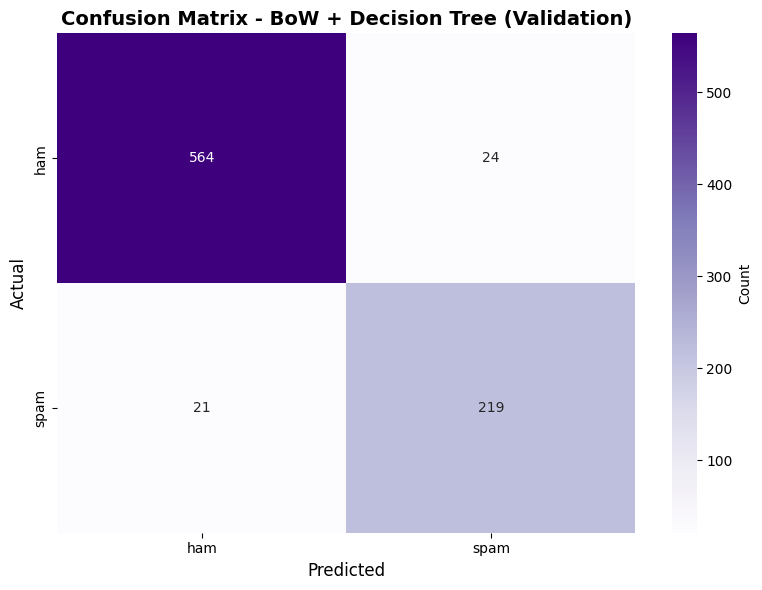

In [ ]:
#BoW with Decision Tree without Entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


clf_bow = DecisionTreeClassifier(random_state=42)
clf_bow.fit(X_train_bow, y_train_bow)

#predict
y_pred_val_bow = clf_bow.predict(X_val_bow)

# Accuracy
val_acc_bow_dt = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"Validation Accuracy (BoW + Decision Tree): {val_acc_bow_dt:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham','spam']))

# Confusion Matrix
cm_val_bow_dt = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_bow_dt, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Decision Tree (Validation)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (BoW + Decision Tree(entropy)): 0.955

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       588
        spam       0.92      0.93      0.92       240

    accuracy                           0.96       828
   macro avg       0.94      0.95      0.95       828
weighted avg       0.96      0.96      0.96       828



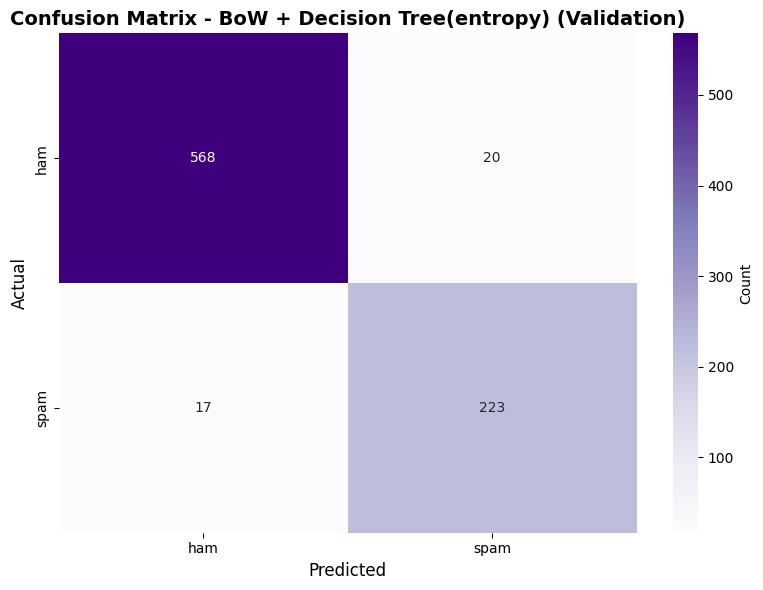

In [ ]:
#BoW - Decision Tree with Entropy

clf_bow_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_bow_entropy.fit(X_train_bow, y_train_bow)

#predict
y_pred_val_bow_entropy = clf_bow_entropy.predict(X_val_bow)

# Accuracy
val_acc_bow_dt_entropy = accuracy_score(y_val_bow, y_pred_val_bow_entropy)
print(f"Validation Accuracy (BoW + Decision Tree(entropy)): {val_acc_bow_dt_entropy:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow_entropy, target_names=['ham','spam']))

# Confusion Matrix
cm_val_bow_dt_entropy = confusion_matrix(y_val_bow, y_pred_val_bow_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_bow_dt_entropy, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Decision Tree(entropy) (Validation)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()




Validation Accuracy (TF + Decision Tree): 0.943

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       588
        spam       0.90      0.90      0.90       240

    accuracy                           0.94       828
   macro avg       0.93      0.93      0.93       828
weighted avg       0.94      0.94      0.94       828



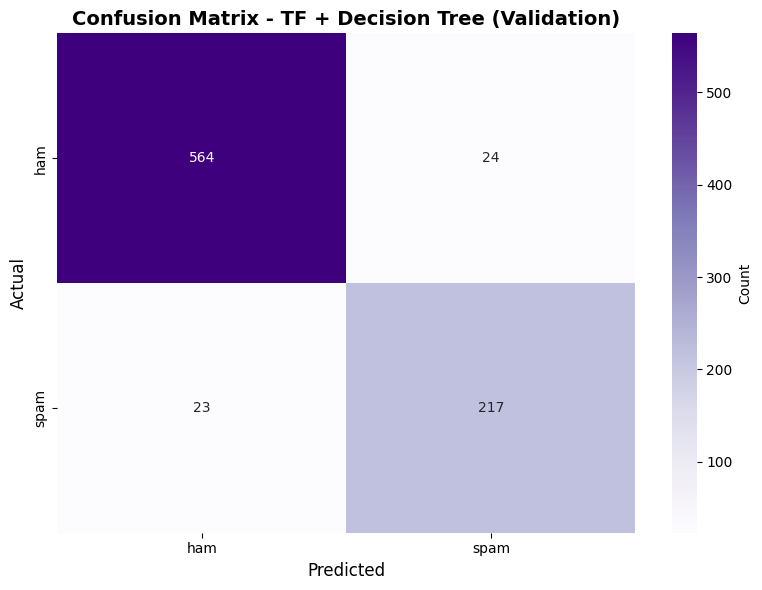

In [ ]:
#TF with Decision Tree without Entropy
clf_tf = DecisionTreeClassifier(random_state=42)
clf_tf.fit(X_train_tf, y_train_tf)

#predict
y_pred_val_tf = clf_tf.predict(X_val_tf)

# Accuracy
val_acc_tf_dt = accuracy_score(y_val_tf, y_pred_val_tf)
print(f"Validation Accuracy (TF + Decision Tree): {val_acc_tf_dt:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tf, y_pred_val_tf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tf_dt = confusion_matrix(y_val_tf, y_pred_val_tf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tf_dt, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF + Decision Tree (Validation)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



Validation Accuracy (TF + Decision Tree(entropy)): 0.948

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.96      0.96       588
        spam       0.90      0.93      0.91       240

    accuracy                           0.95       828
   macro avg       0.93      0.94      0.94       828
weighted avg       0.95      0.95      0.95       828



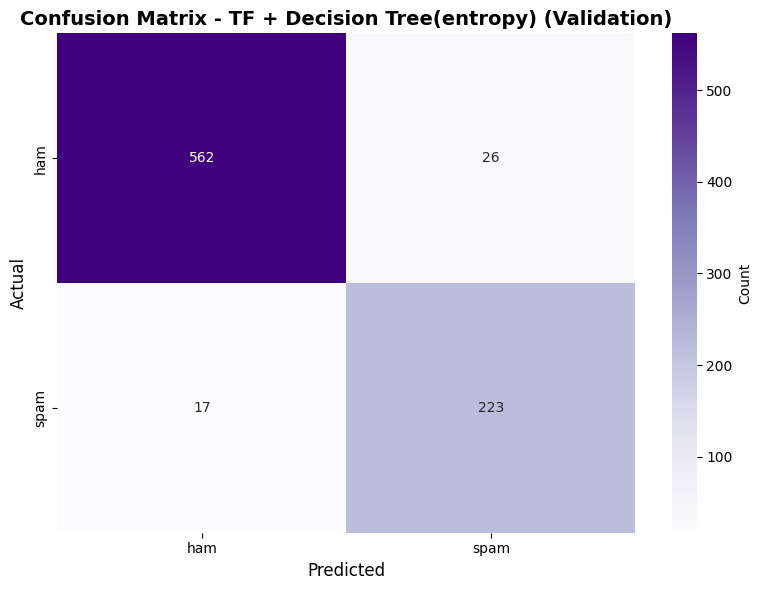

In [ ]:
# TF with Decision Tree with Entropy
clf_tf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_tf_entropy.fit(X_train_tf, y_train_tf)

# Predict
y_pred_val_tf_entropy = clf_tf_entropy.predict(X_val_tf)

# Accuracy
val_acc_tf_dt_entropy = accuracy_score(y_val_tf, y_pred_val_tf_entropy)
print(f"Validation Accuracy (TF + Decision Tree(entropy)): {val_acc_tf_dt_entropy:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tf, y_pred_val_tf_entropy, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tf_dt_entropy = confusion_matrix(y_val_tf, y_pred_val_tf_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tf_dt_entropy, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF + Decision Tree(entropy) (Validation)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF-IDF + Decision Tree): 0.954

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       588
        spam       0.92      0.93      0.92       240

    accuracy                           0.95       828
   macro avg       0.94      0.95      0.94       828
weighted avg       0.95      0.95      0.95       828



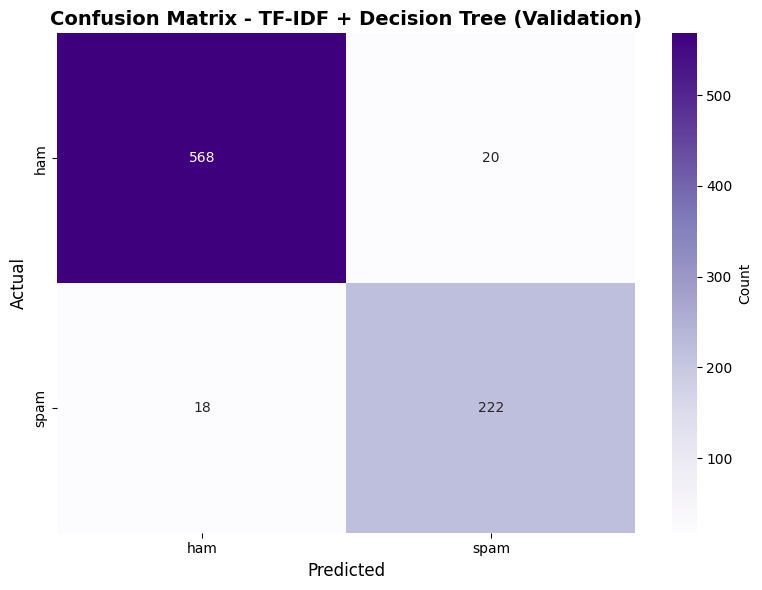

In [ ]:
# TF-IDF with Decision Tree without Entropy
clf_tfidf = DecisionTreeClassifier(random_state=42)
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict
y_pred_val_tfidf = clf_tfidf.predict(X_val_tfidf)

# Accuracy
val_acc_tfidf_dt = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"Validation Accuracy (TF-IDF + Decision Tree): {val_acc_tfidf_dt:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tfidf_dt = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tfidf_dt, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + Decision Tree (Validation)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF-IDF + Decision Tree(entropy)): 0.955

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.96      0.97       588
        spam       0.90      0.95      0.93       240

    accuracy                           0.96       828
   macro avg       0.94      0.95      0.95       828
weighted avg       0.96      0.96      0.96       828



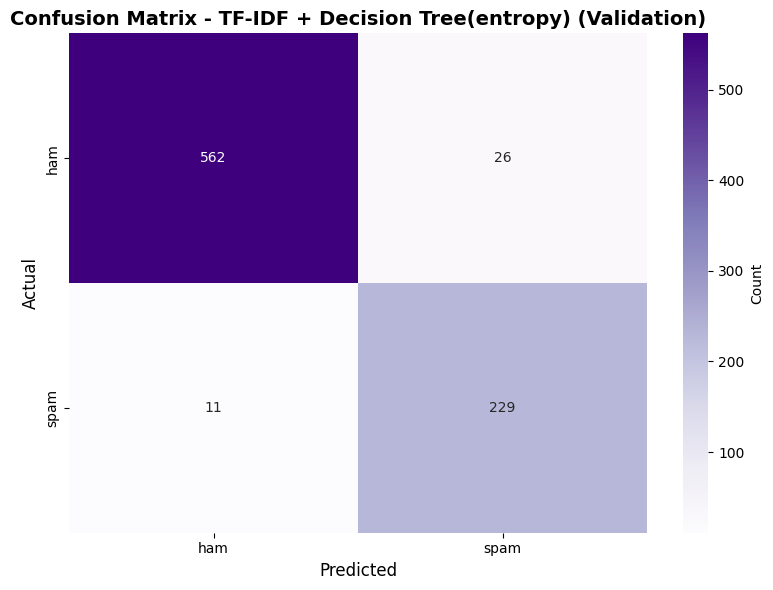

In [ ]:
# TF-IDF with Decision Tree with Entropy
clf_tfidf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_tfidf_entropy.fit(X_train_tfidf, y_train_tfidf)

# Predict
y_pred_val_tfidf_entropy = clf_tfidf_entropy.predict(X_val_tfidf)

# Accuracy
val_acc_tfidf_dt_entropy = accuracy_score(y_val_tfidf, y_pred_val_tfidf_entropy)
print(f"Validation Accuracy (TF-IDF + Decision Tree(entropy)): {val_acc_tfidf_dt_entropy:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf_entropy, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tfidf_dt_entropy = confusion_matrix(y_val_tfidf, y_pred_val_tfidf_entropy)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tfidf_dt_entropy, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + Decision Tree(entropy) (Validation)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (BoW + KNN 'Euclidean'): 0.862

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.83      0.90       588
        spam       0.69      0.95      0.80       240

    accuracy                           0.86       828
   macro avg       0.83      0.89      0.85       828
weighted avg       0.89      0.86      0.87       828



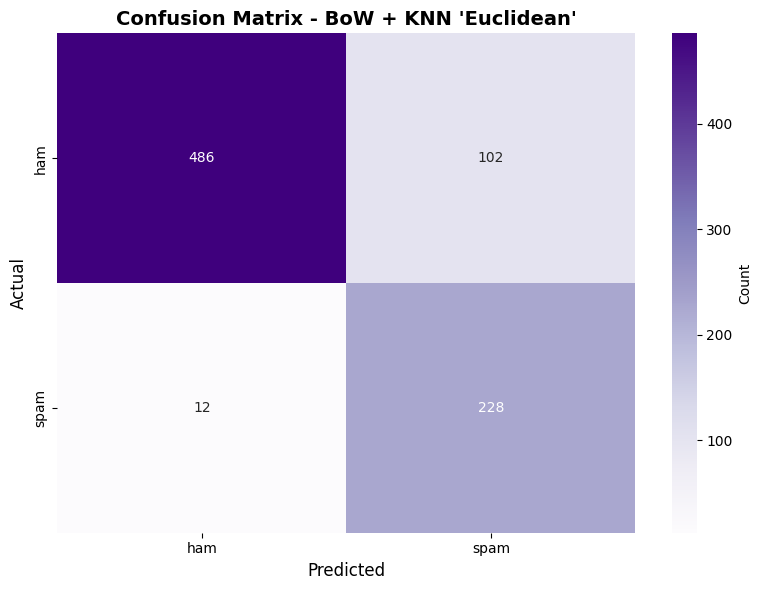

In [ ]:
# BoW with KNN 'Euclidean'
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_bow, y_train_bow)

# Predict
y_pred_val_bow = knn.predict(X_val_bow)

# Accuracy
val_acc_bow_knn = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"Validation Accuracy (BoW + KNN 'Euclidean'): {val_acc_bow_knn:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham','spam']))

# Confusion Matrix
cm_val_bow_knn = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_bow_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + KNN 'Euclidean'", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (BoW + KNN 'Manhattan'): 0.777

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.69      0.81       588
        spam       0.57      1.00      0.72       240

    accuracy                           0.78       828
   macro avg       0.78      0.84      0.77       828
weighted avg       0.87      0.78      0.79       828



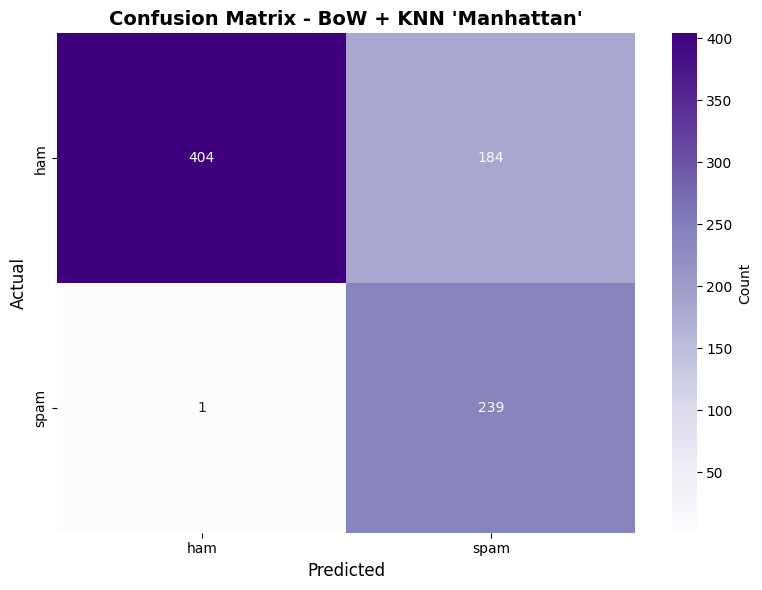

In [ ]:
# BoW with KNN 'Manhattan'
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_bow, y_train_bow)

# Predict
y_pred_val_bow = knn.predict(X_val_bow)

# Accuracy
val_acc_bow_knn = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"Validation Accuracy (BoW + KNN 'Manhattan'): {val_acc_bow_knn:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham','spam']))

# Confusion Matrix
cm_val_bow_knn = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_bow_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + KNN 'Manhattan'", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF + KNN 'Manhattan'): 0.588

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.42      0.59       588
        spam       0.41      1.00      0.58       240

    accuracy                           0.59       828
   macro avg       0.71      0.71      0.59       828
weighted avg       0.83      0.59      0.59       828



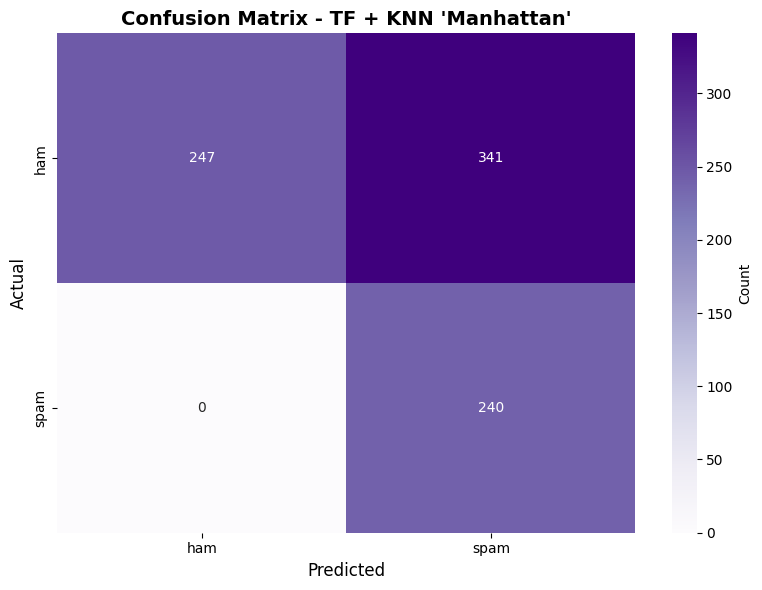

In [ ]:
# TF with KNN 'Manhattan'
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_tf, y_train_tf)

# Predict
y_pred_val_tf = knn.predict(X_val_tf)

# Accuracy
val_acc_tf_knn = accuracy_score(y_val_tf, y_pred_val_tf)
print(f"Validation Accuracy (TF + KNN 'Manhattan'): {val_acc_tf_knn:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tf, y_pred_val_tf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tf_knn = confusion_matrix(y_val_tf, y_pred_val_tf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tf_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF + KNN 'Manhattan'", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF + KNN 'Euclidean'): 0.732

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.62      0.77       588
        spam       0.52      1.00      0.68       240

    accuracy                           0.73       828
   macro avg       0.76      0.81      0.73       828
weighted avg       0.86      0.73      0.74       828



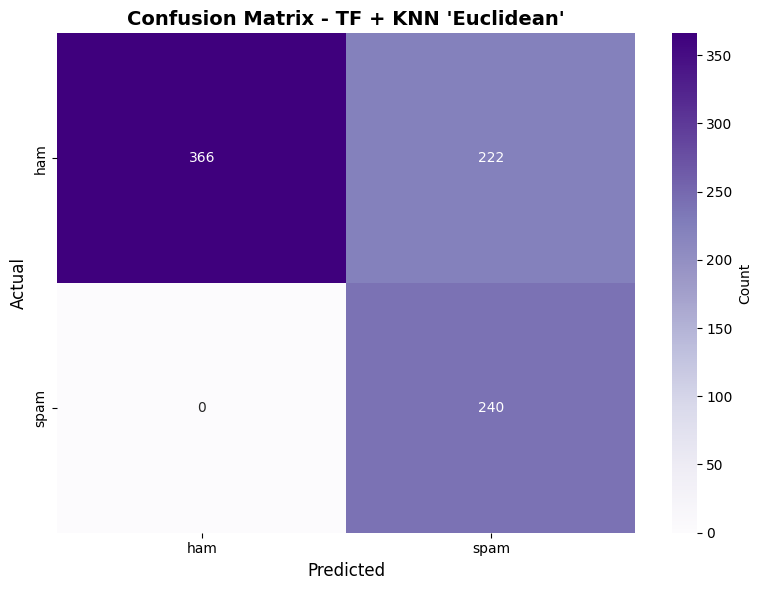

In [ ]:
# TF with KNN 'Euclidean'
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_tf, y_train_tf)

y_pred_val_tf = knn.predict(X_val_tf)

# Accuracy
val_acc_tf_knn = accuracy_score(y_val_tf, y_pred_val_tf)
print(f"Validation Accuracy (TF + KNN 'Euclidean'): {val_acc_tf_knn:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tf, y_pred_val_tf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tf_knn = confusion_matrix(y_val_tf, y_pred_val_tf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tf_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF + KNN 'Euclidean'", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF-IDF + KNN 'Euclidean'): 0.644

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.50      0.67       588
        spam       0.45      1.00      0.62       240

    accuracy                           0.64       828
   macro avg       0.72      0.75      0.64       828
weighted avg       0.84      0.64      0.65       828



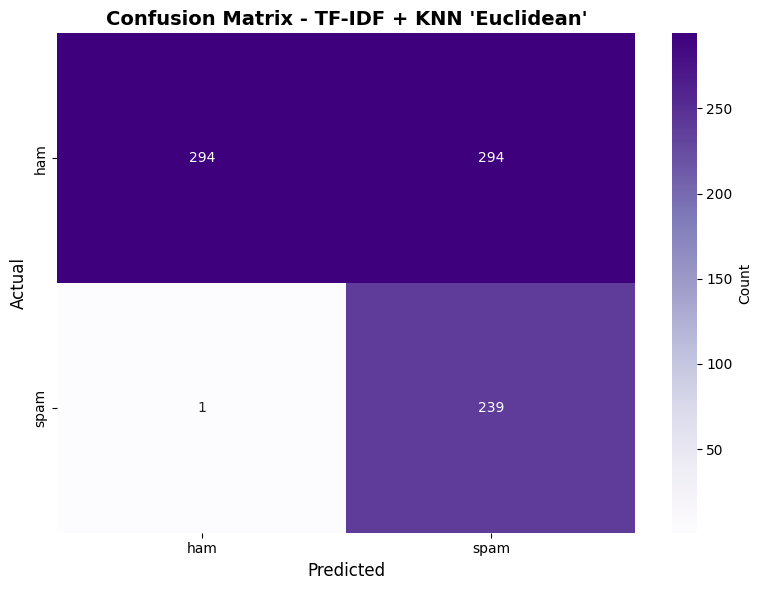

In [ ]:
# TF-IDF with KNN 'Euclidean'
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_tfidf, y_train_tfidf)

# Predict
y_pred_val_tfidf = knn.predict(X_val_tfidf)

# Accuracy
val_acc_tfidf_knn = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"Validation Accuracy (TF-IDF + KNN 'Euclidean'): {val_acc_tfidf_knn:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tfidf_knn = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tfidf_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + KNN 'Euclidean'", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF-IDF + KNN 'Manhattan'): 0.572

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.40      0.57       588
        spam       0.40      1.00      0.58       240

    accuracy                           0.57       828
   macro avg       0.70      0.70      0.57       828
weighted avg       0.83      0.57      0.57       828



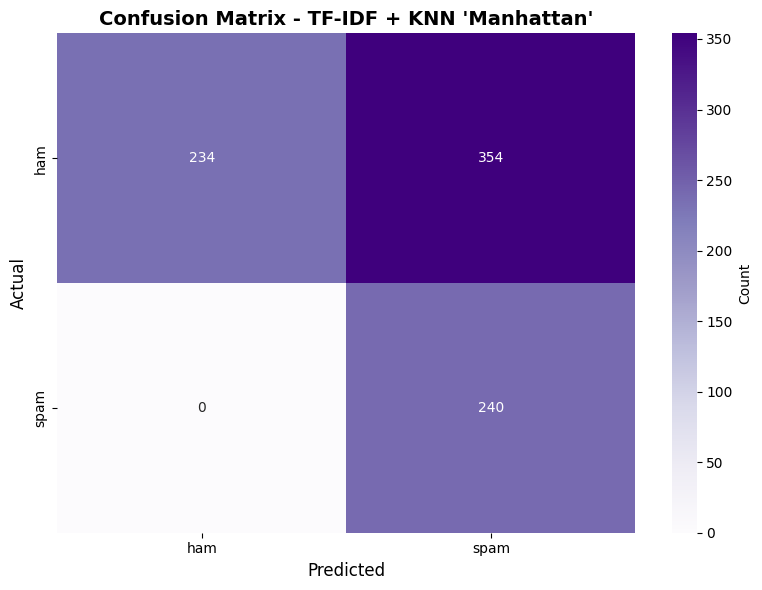

In [ ]:
# TF-IDF with KNN 'Manhattan'
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train_tfidf, y_train_tfidf)

# Predict
y_pred_val_tfidf = knn.predict(X_val_tfidf)

# Accuracy
val_acc_tfidf_knn = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"Validation Accuracy (TF-IDF + KNN 'Manhattan'): {val_acc_tfidf_knn:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tfidf_knn = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tfidf_knn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + KNN 'Manhattan'", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (BoW + Naive-Bayes): 0.979

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       588
        spam       0.97      0.96      0.96       240

    accuracy                           0.98       828
   macro avg       0.98      0.97      0.98       828
weighted avg       0.98      0.98      0.98       828



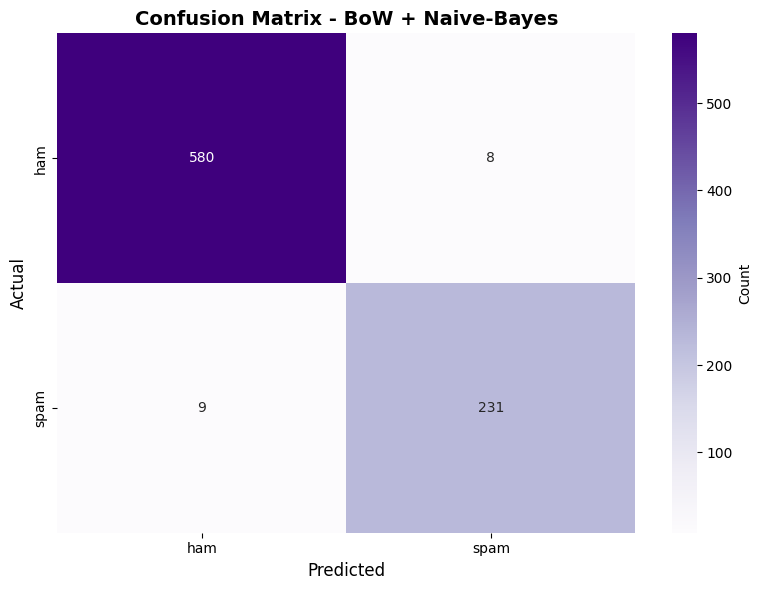

In [ ]:
#Bow with Naive-Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_bow, y_train_bow)

# Predict
y_pred_val_bow = nb.predict(X_val_bow)

# Accuracy
val_acc_bow_nb = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"Validation Accuracy (BoW + Naive-Bayes): {val_acc_bow_nb:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham','spam']))

# Confusion Matrix
cm_val_bow_nb = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_bow_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Naive-Bayes", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF + Naive-Bayes): 0.903

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.88      1.00      0.94       588
        spam       0.99      0.67      0.80       240

    accuracy                           0.90       828
   macro avg       0.94      0.83      0.87       828
weighted avg       0.91      0.90      0.90       828



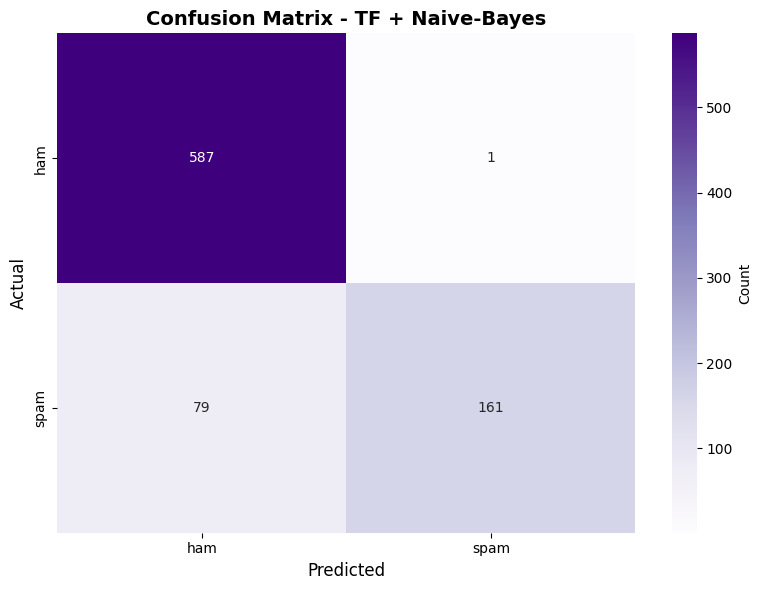

In [ ]:
# TF with Naive-Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tf, y_train_tf)

# --- Inference ---
y_pred_val_tf = nb.predict(X_val_tf)

# Accuracy
val_acc_tf_nb = accuracy_score(y_val_tf, y_pred_val_tf)
print(f"Validation Accuracy (TF + Naive-Bayes): {val_acc_tf_nb:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tf, y_pred_val_tf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tf_nb = confusion_matrix(y_val_tf, y_pred_val_tf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tf_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF + Naive-Bayes", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF-IDF + Naive-Bayes): 0.901

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.88      1.00      0.93       588
        spam       0.99      0.66      0.80       240

    accuracy                           0.90       828
   macro avg       0.94      0.83      0.86       828
weighted avg       0.91      0.90      0.89       828



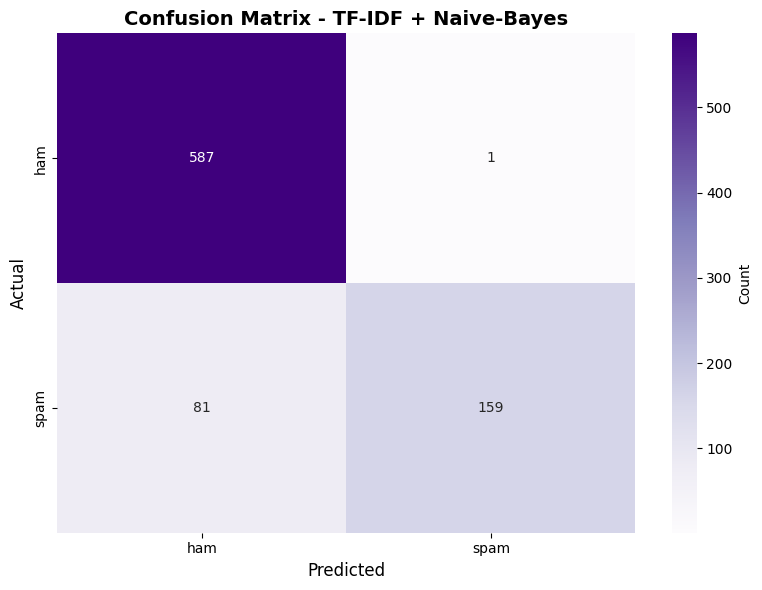

In [ ]:
# TF-IDF with Naive-Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train_tfidf)

# Predict
y_pred_val_tfidf = nb.predict(X_val_tfidf)

# Accuracy
val_acc_tfidf_nb = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"Validation Accuracy (TF-IDF + Naive-Bayes): {val_acc_tfidf_nb:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tfidf_nb = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tfidf_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + Naive-Bayes", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (BoW + Random Forest): 0.983

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       588
        spam       0.95      0.99      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.99      0.98       828
weighted avg       0.98      0.98      0.98       828



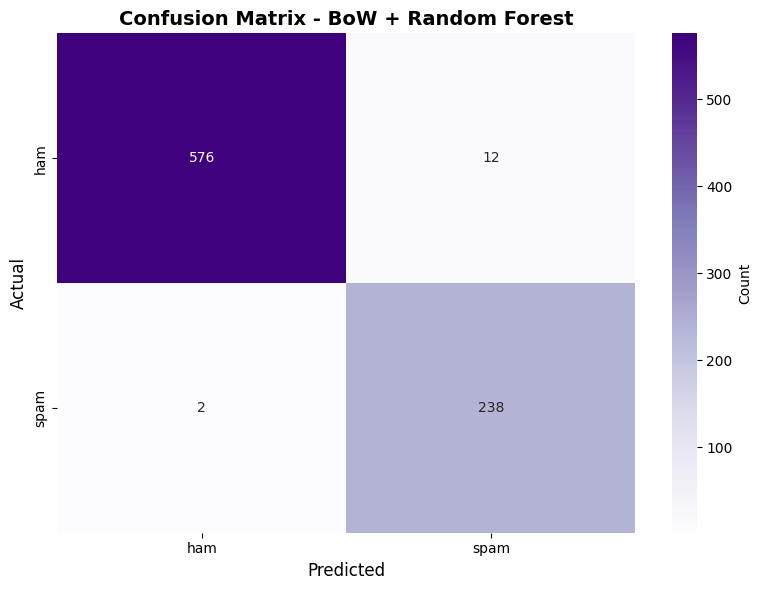

In [ ]:
# BoW with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf.fit(X_train_bow, y_train_bow)

# Predict
y_pred_val_bow = rf.predict(X_val_bow)

# Accuracy
val_acc_bow_rf = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"Validation Accuracy (BoW + Random Forest): {val_acc_bow_rf:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham','spam']))

# Confusion Matrix
cm_val_bow_rf = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_bow_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Random Forest", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF + Random Forest): 0.981

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       588
        spam       0.95      0.99      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.98      0.98       828
weighted avg       0.98      0.98      0.98       828



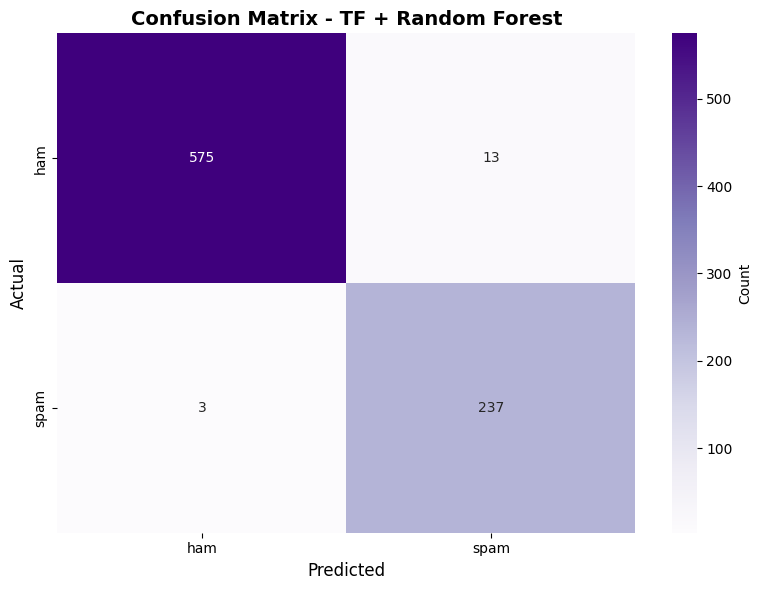

In [ ]:
# TF with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf.fit(X_train_tf, y_train_tf)

# Predict
y_pred_val_tf = rf.predict(X_val_tf)

# Accuracy
val_acc_tf_rf = accuracy_score(y_val_tf, y_pred_val_tf)
print(f"Validation Accuracy (TF + Random Forest): {val_acc_tf_rf:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tf, y_pred_val_tf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tf_rf = confusion_matrix(y_val_tf, y_pred_val_tf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tf_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF + Random Forest", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Validation Accuracy (TF-IDF + Random Forest): 0.983

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       588
        spam       0.95      1.00      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.99      0.98       828
weighted avg       0.98      0.98      0.98       828



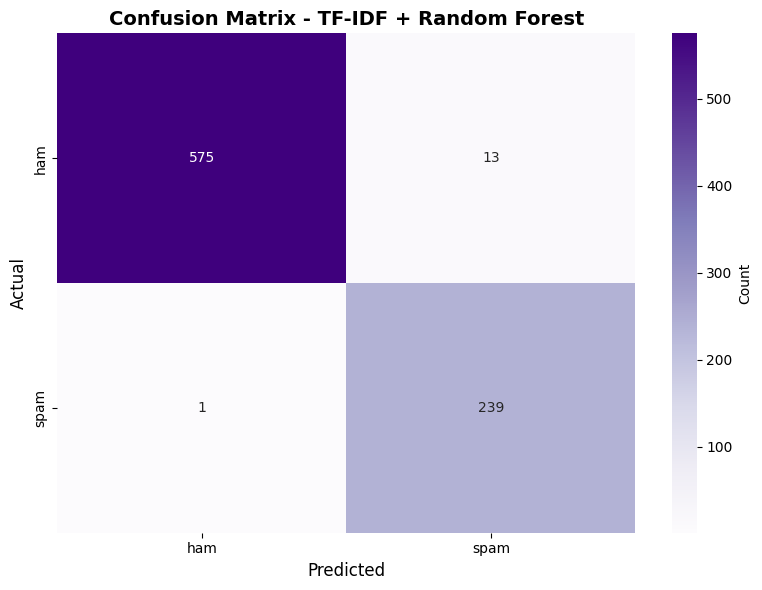

In [ ]:
# TF-IDF with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf.fit(X_train_tfidf, y_train_tfidf)

# Predict
y_pred_val_tfidf = rf.predict(X_val_tfidf)

# Accuracy
val_acc_tfidf_rf = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"Validation Accuracy (TF-IDF + Random Forest): {val_acc_tfidf_rf:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham','spam']))

# Confusion Matrix
cm_val_tfidf_rf = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val_tfidf_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham','spam'], yticklabels=['ham','spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + Random Forest", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


2.CROSS-VALIDATION


BoW + Naive Bayes Multinomial:
Accuracy por fold: [0.97432024 0.97432024 0.97885196 0.98187311 0.97276853]
Mean Accuracy: 0.9764268182877723
Std Deviation: 0.003

Validation Accuracy: 0.9795

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       588
        spam       0.97      0.96      0.96       240

    accuracy                           0.98       828
   macro avg       0.98      0.97      0.98       828
weighted avg       0.98      0.98      0.98       828



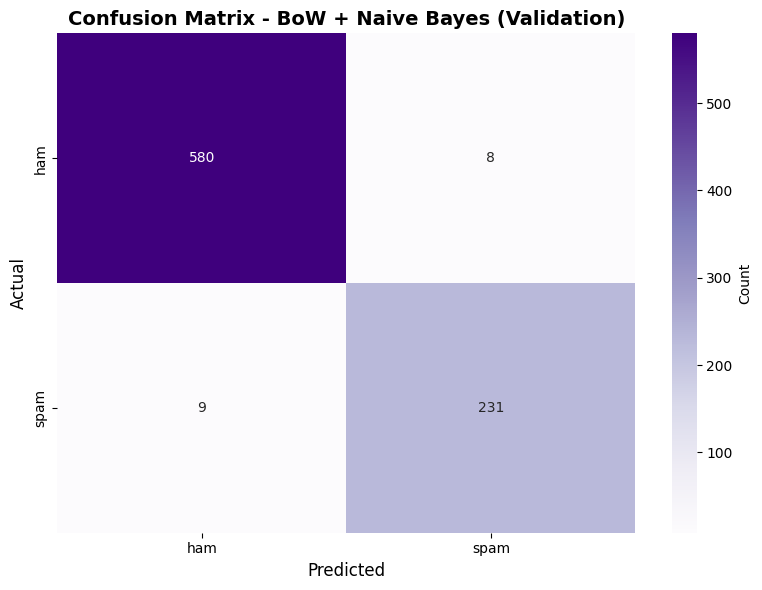

In [ ]:
#Naive Bayes + BOW - cross-validation
import numpy as np
nb = MultinomialNB()

# K-Fold (not stratified)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(nb, X_train_bow, y_train_bow, cv=kf, scoring='accuracy', n_jobs=-1)

print("\nBoW + Naive Bayes Multinomial:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

# TRAIN
nb.fit(X_train_bow, y_train_bow)

# PREDICT
y_pred_val_bow = nb.predict(X_val_bow)

# Accuracy - Validation
val_accuracy = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val_bow_nb = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_bow_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Naive Bayes (Validation)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



BoW + Random Forest:
Accuracy por fold: [0.96676737 0.97432024 0.98187311 0.98338369 0.96369138]
Mean Accuracy: 0.9740071575156198
Std Deviation: 0.008

Validation Accuracy: 0.9831

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       588
        spam       0.95      0.99      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.99      0.98       828
weighted avg       0.98      0.98      0.98       828



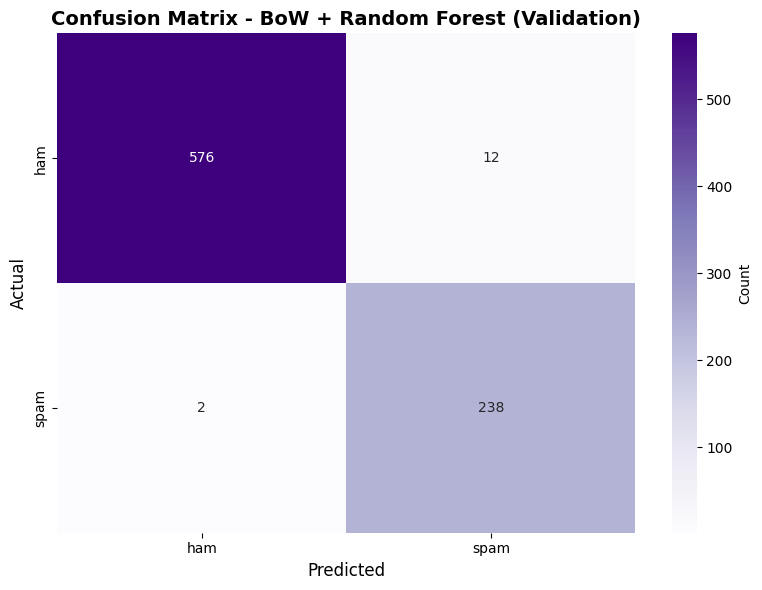

In [ ]:
#Random Forest + BOW - cross-validation

rf = RandomForestClassifier(n_estimators=100, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train_bow, y_train_bow, cv=kf, scoring='accuracy', n_jobs=-1)

print("\nBoW + Random Forest:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

# TRAIN
rf.fit(X_train_bow, y_train_bow)

# PREDICT
y_pred_val_bow = rf.predict(X_val_bow)

# Accuracy - Validation
val_accuracy = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val_bow_rf = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_bow_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Random Forest (Validation)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

TFIDF + Random Forest:
Accuracy por fold: [0.97129909 0.97583082 0.97734139 0.97583082 0.97881997]
Mean Accuracy: 0.9758244169092878
Std Deviation: 0.003

Validation Accuracy: 0.9831

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       588
        spam       0.95      1.00      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.99      0.98       828
weighted avg       0.98      0.98      0.98       828



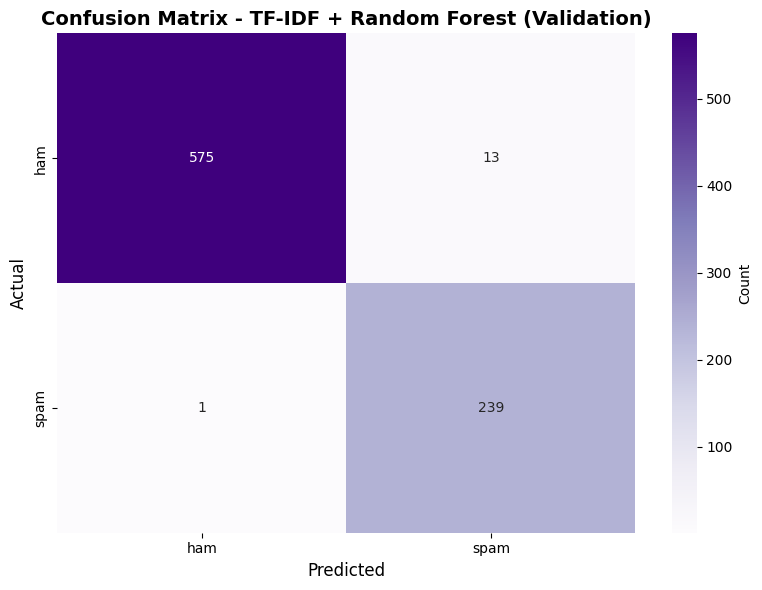

In [ ]:
#TFIDF and RandomForest - cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# CV 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train_tfidf, y_train_tfidf, cv=kf, scoring='accuracy', n_jobs=-1)

print("TFIDF + Random Forest:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

#TRAIN
rf.fit(X_train_tfidf, y_train_tfidf)
#predict
y_pred_val_tfidf = rf.predict(X_val_tfidf)

# Accuracy - Validation
val_accuracy = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val_tfidf_rf = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_tfidf_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + Random Forest (Validation)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

3.STRATIFIED CROSS-VALIDATION


BoW + Naive Bayes Multinomial:
Accuracy por fold: [0.97280967 0.97885196 0.97583082 0.97432024 0.98335855]
Mean Accuracy: 0.977034247295364
Std Deviation: 0.004

Validation Accuracy: 0.9795

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       588
        spam       0.97      0.96      0.96       240

    accuracy                           0.98       828
   macro avg       0.98      0.97      0.98       828
weighted avg       0.98      0.98      0.98       828



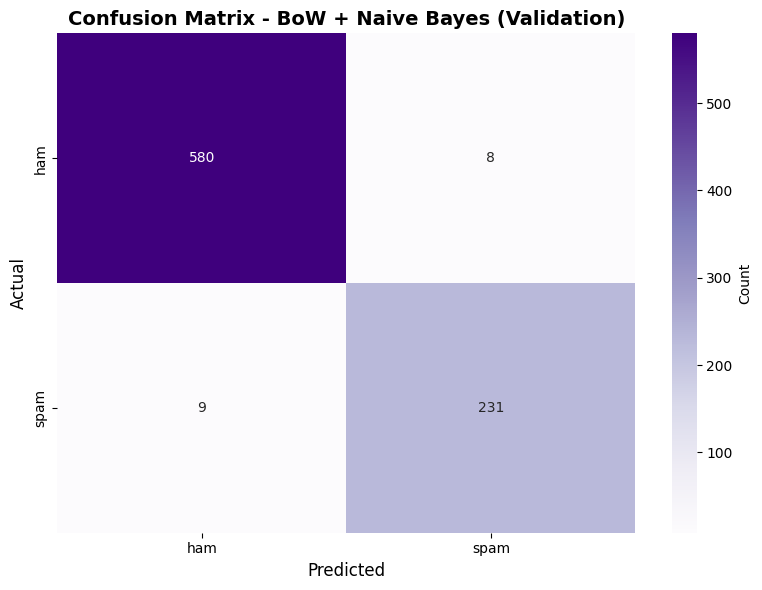

In [ ]:
# NAIVE BAYES + Bow - stratified
from sklearn.model_selection import StratifiedKFold

nb = MultinomialNB()

# Stratified 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(nb, X_train_bow, y_train_bow, cv=skf, scoring='accuracy', n_jobs=-1)

print("\nBoW + Naive Bayes Multinomial:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

# TRAIN
nb.fit(X_train_bow, y_train_bow)

# PREDICT
y_pred_val_bow = nb.predict(X_val_bow)

# Accuracy - Validation
val_accuracy = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val_bow_nb = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_bow_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Naive Bayes (Validation)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



BoW + Random Forest:
Accuracy por fold: [0.97129909 0.97129909 0.97583082 0.97280967 0.97428139]
Mean Accuracy: 0.9731040125050848
Std Deviation: 0.002

Validation Accuracy: 0.9831

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       588
        spam       0.95      0.99      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.99      0.98       828
weighted avg       0.98      0.98      0.98       828



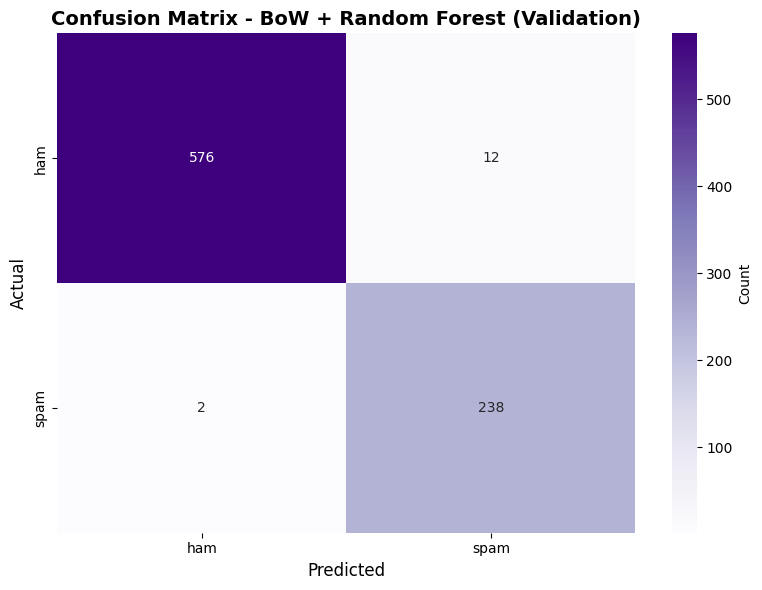

In [ ]:
#Random Forest + BoW - stratified

rf = RandomForestClassifier(n_estimators=100, random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train_bow, y_train_bow, cv=skf, scoring='accuracy', n_jobs=-1)
print("\nBoW + Random Forest:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

# TRAIN
rf.fit(X_train_bow, y_train_bow)

# PREDICT
y_pred_val_bow = rf.predict(X_val_bow)

# Accuracy - Validation
val_accuracy = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val_bow_rf = confusion_matrix(y_val_bow, y_pred_val_bow)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_bow_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Random Forest (Validation)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

TFIDF + Random Forest:
Accuracy por fold: [0.97885196 0.97280967 0.97583082 0.97432024 0.98335855]
Mean Accuracy: 0.977034247295364
Std Deviation: 0.004

Validation Accuracy: 0.9831

Validation Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       588
        spam       0.95      1.00      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.99      0.98       828
weighted avg       0.98      0.98      0.98       828



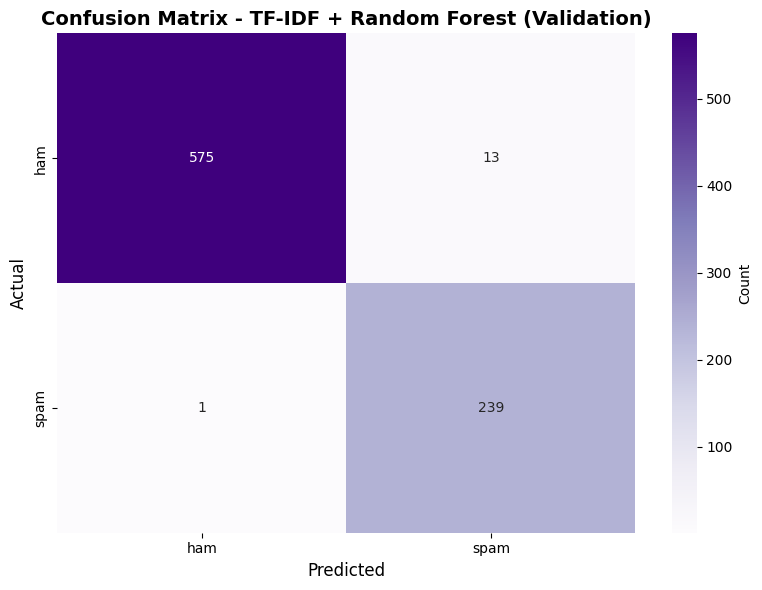

In [ ]:
#TFIDF and RandomForest
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Stratified 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation
scores = cross_val_score(rf, X_train_tfidf, y_train_tfidf, cv=skf, scoring='accuracy', n_jobs=-1)

print("TFIDF + Random Forest:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

#TRAIN
rf.fit(X_train_tfidf, y_train_tfidf)
#predict
y_pred_val_tfidf = rf.predict(X_val_tfidf)

# Accuracy - Validation
val_accuracy = accuracy_score(y_val_tfidf, y_pred_val_tfidf)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_tfidf, y_pred_val_tfidf, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val_tfidf_rf = confusion_matrix(y_val_tfidf, y_pred_val_tfidf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_tfidf_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - TF-IDF + Random Forest (Validation)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5.1. FEATURE SUBSET SELECTION WITH THE BEST MODEL (RANDOM FOREST+BOW)

In [ ]:
#FEATURE SUBSET SELECTION

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

ig_scores = mutual_info_classif(X_train_bow, y_train_bow, random_state=42)

feature_names = vectorizer.get_feature_names_out()

ig_series = pd.Series(ig_scores, index=feature_names).sort_values(ascending=False)

print("\nTop 50 words with more Information Gain:")
print(ig_series.head(50))


Top 50 words with more Information Gain:
enron           0.120842
cc              0.089874
hpl             0.082319
gas             0.079080
daren           0.077256
http            0.076148
pm              0.064564
thanks          0.064141
hou             0.062399
ect             0.062153
subject         0.057828
meter           0.056422
forward         0.054745
deal            0.048798
volume          0.043110
corp            0.041824
attach          0.040512
nom             0.039694
farmer          0.038999
offer           0.038067
www             0.037246
mmbtu           0.035445
product         0.034995
xl              0.031884
sitara          0.029531
let             0.027907
click           0.027511
nomination      0.027493
question        0.027213
money           0.025105
bob             0.025005
online          0.024908
texas           0.024685
stop            0.024258
viagra          0.023240
remove          0.023132
prescription    0.022652
best            0.022252
paliourg

Evaluation with different k values using Stratified Cross-Validation

--- Top 500 features ---
Accuracy por fold: [0.95619335 0.96827795 0.97734139 0.96223565 0.96974281]
Mean Accuracy: 0.966758230457377
Std Deviation: 0.007
First 10 features: ['act', 'action', 'acton', 'actuals', 'ad', 'address', 'adobe', 'advertisement', 'advice', 'advisor']
Validation Accuracy: 0.9710

--- Top 1000 features ---
Accuracy por fold: [0.96072508 0.97280967 0.98036254 0.96827795 0.97881997]
Mean Accuracy: 0.9721990392657833
Std Deviation: 0.007
First 10 features: ['acceptance', 'accuracy', 'acquire', 'acquisition', 'acrobat', 'act', 'action', 'activity', 'acton', 'actual']
Validation Accuracy: 0.9783

--- Top 1500 features ---
Accuracy por fold: [0.96374622 0.97885196 0.98036254 0.9652568  0.97428139]
Mean Accuracy: 0.972499782897834
Std Deviation: 0.007
First 10 features: ['aa', 'accept', 'acceptance', 'accessory', 'accordance', 'account', 'accuracy', 'acheive', 'acquire', 'acquisition']
Validation Accu

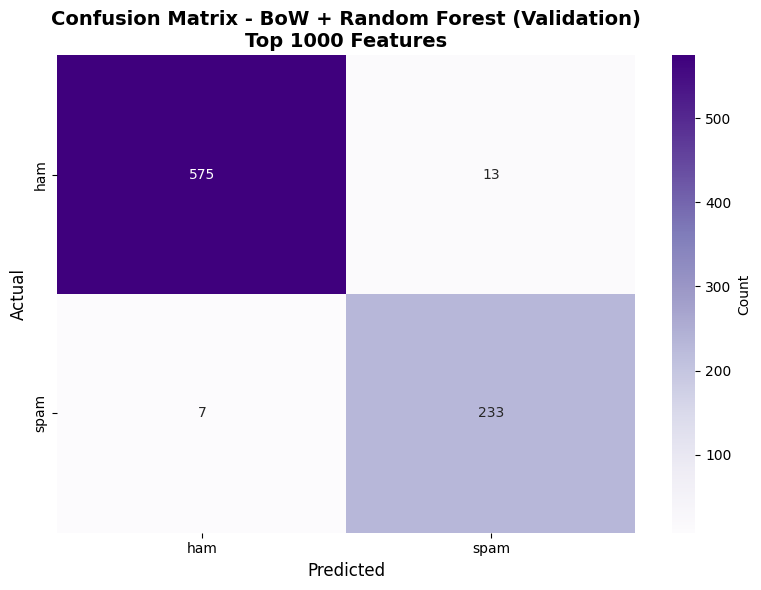

In [ ]:
# Try different values for k with Stratified Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k_values = [500, 1000, 1500]
results_by_k = []

for top_k in k_values:
    print(f"\nTop {top_k} features")

    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=top_k)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Stratified Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train_bow, y_train_bow,
                             cv=skf, scoring='accuracy')

    print("Accuracy por fold:", scores)
    print("Mean Accuracy:", np.mean(scores))
    print(f"Std Deviation: {np.std(scores):.3f}")

    # Select features
    pipeline.fit(X_train_bow, y_train_bow)
    selector = pipeline.named_steps['feature_selection']
    selected_features = feature_names[selector.get_support()]
    print(f"First 10 features: {list(selected_features[:10])}")

    # Predict and validate
    y_val_pred = pipeline.predict(X_val_bow)
    val_accuracy = accuracy_score(y_val_bow, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    results_by_k.append({
        'K': top_k,
        'Mean_CV_Accuracy': np.mean(scores),
        'Std_CV_Accuracy': np.std(scores),
        'Val_Accuracy': val_accuracy,
        'Features': list(selected_features)
    })

# Convert into Dataframe
results_df = pd.DataFrame(results_by_k)
print("SUMMARY:")
print(results_df[['K', 'Mean_CV_Accuracy', 'Std_CV_Accuracy', 'Val_Accuracy']])

best_k = results_df.loc[results_df['Val_Accuracy'].idxmax(), 'K']
print(f"\nBEST K: {best_k}")

# Classification Report - VALIDATION
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_val_pred, target_names=['ham', 'spam']))

# Confusion Matrix - VALIDATION
cm_val = confusion_matrix(y_val_bow, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title(f"Confusion Matrix - BoW + Random Forest (Validation)\nTop {best_k} Features",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 6.TRAINING THE FINAL MODEL

TRAINING THE FINAL MODEL (BOW + RANDOM FOREST, with the top 1000 features with more Information Gain)



TEST Accuracy (BoW + Random Forest + Top 1000 Features): 0.978

TEST Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.98       735
        spam       0.95      0.98      0.96       300

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



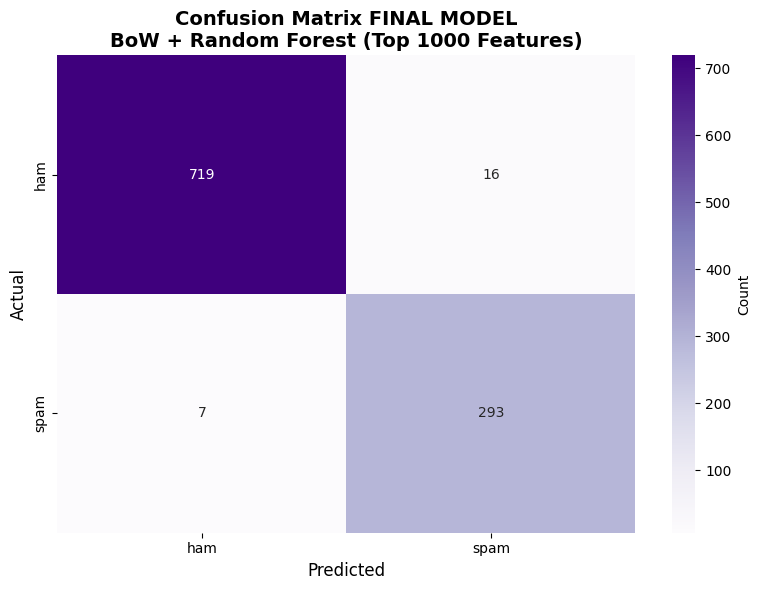

In [ ]:
# BoW with Random Forest  FINAL MODEL (with k=1000 feature selection)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# k=1000
best_k = 1000
selector = SelectKBest(score_func=mutual_info_classif, k=best_k)

X_train_temp_selected = selector.fit_transform(X_train_temp_bow, y_train_temp_bow)
X_test_selected = selector.transform(X_test_bow)

selected_features = feature_names[selector.get_support()]

rf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rf.fit(X_train_temp_selected, y_train_temp_bow)

# Predict on test set
y_pred_test_bow = rf.predict(X_test_selected)

# Accuracy
test_acc_bow_rf = accuracy_score(y_test_bow, y_pred_test_bow)
print(f"\nTEST Accuracy (BoW + Random Forest + Top {best_k} Features): {test_acc_bow_rf:.3f}")

# Classification Report
print("\nTEST Classification Report:")
print(classification_report(y_test_bow, y_pred_test_bow, target_names=['ham', 'spam']))

# Confusion Matrix
cm_test_bow_rf = confusion_matrix(y_test_bow, y_pred_test_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_bow_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title(f"Confusion Matrix FINAL MODEL\nBoW + Random Forest (Top {best_k} Features)",
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

7. FURTHER EXPERIMENT: TRAINING WITH THE STEMMED CORPUS INSTEAD OF WITH THE LEMMATIZED

In [ ]:
#Vectorizing Snowball Stemmed Corpus
df_bow_st, vectorizer = build_bow(snowball_corpus)
X_bow_st, vectorizer = build_bow(snowball_corpus)
df_tf_st, vectorizer_TF = build_tf(snowball_corpus)
df_tfidf_st, vectorizer_TFIDF = build_tfidf(snowball_corpus)

In [ ]:
#Splitting Snowball Stemming Corpus
(X_train_bow, X_val_bow, X_test_bow,
 y_train_bow, y_val_bow, y_test_bow,
 X_train_temp_bow, y_train_temp_bow) = split_train_val_test(
    df_bow_st, y, test_size=0.20, val_size=0.20, random_state=42
)

(X_train_bow, X_val_bow, X_test_bow,
 y_train_bow, y_val_bow, y_test_bow,
 X_train_temp_bow, y_train_temp_bow) = split_train_val_test(
    X_bow_st, y, test_size=0.20, val_size=0.20, random_state=42
)

(X_train_bow, X_val_bow, X_test_bow,
 y_train_bow, y_val_bow, y_test_bow,
 X_train_temp_bow, y_train_temp_bow) = split_train_val_test(
    df_tf_st, y, test_size=0.20, val_size=0.20, random_state=42
)

(X_train_bow, X_val_bow, X_test_bow,
 y_train_bow, y_val_bow, y_test_bow,
 X_train_temp_bow, y_train_temp_bow) = split_train_val_test(
    df_tfidf_st, y, test_size=0.20, val_size=0.20, random_state=42
)


Cross-Validation Results:
Accuracy por fold: [0.97734139 0.97583082 0.97734139 0.96374622 0.97881997]
Mean Accuracy: 0.9746159576947863
Std Deviation: 0.006

Validation Accuracy (BoW + Random Forest): 0.979

Validation Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       588
        spam       0.94      0.99      0.97       240

    accuracy                           0.98       828
   macro avg       0.97      0.98      0.98       828
weighted avg       0.98      0.98      0.98       828



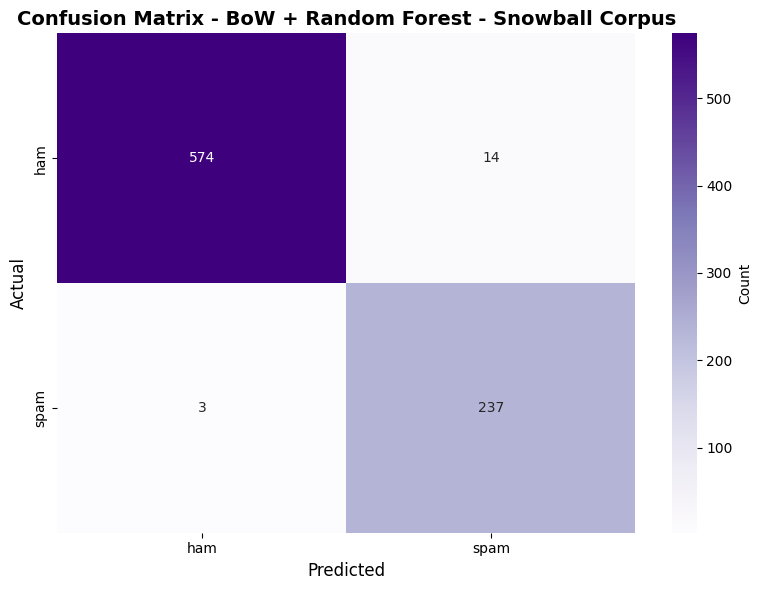

In [ ]:
# BoW with Random Forest - SNOWBALL CORPUS with Stratified CV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


rf = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)


# Stratified Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X_train_bow, y_train_bow, cv=skf, scoring='accuracy')

print("\nCross-Validation Results:")
print("Accuracy por fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print(f"Std Deviation: {np.std(scores):.3f}")

#train
rf.fit(X_train_bow, y_train_bow)

# predict
y_pred_val_bow = rf.predict(X_val_bow)

#accuracy
val_acc_bow_rf = accuracy_score(y_val_bow, y_pred_val_bow)
print(f"\nValidation Accuracy (BoW + Random Forest): {val_acc_bow_rf:.3f}")

# Classification Report
print("\nValidation Classification Report:")
print(classification_report(y_val_bow, y_pred_val_bow, target_names=['ham', 'spam']))

# Confusion Matrix
cm_val_bow_rf = confusion_matrix(y_val_bow, y_pred_val_bow)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_bow_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'],
            cbar_kws={'label': 'Count'})
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - BoW + Random Forest - Snowball Corpus", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

